Categorizing countries using some socio-economic and health factors - **PCA** | **Kmeans**

Kaggle Dataset: https://www.kaggle.com/code/tanmay111999/clustering-pca-k-means-dbscan-hierarchical/input?select=Country-data.csv
<br><br>
**Problem Statement**:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

- **country**: Name of the country
- **child_mort**: Death of children under 5 years of age per 1000 live births
- **exports**: Exports of goods and services per capita. Given as %age of the GDP per capita
- **health**: Total health spending per capita. Given as %age of GDP per capita
- **imports**: Imports of goods and services per capita. Given as %age of the GDP per capita
- **Income**: Net income per person
- **Inflation**: The measurement of the annual growth rate of the Total GDP
- **life_expec**: The average number of years a new born child would live if the current mortality patterns are to remain the same.
- **total_fer**: The number of children that would be born to each woman if the current age fertility rates remain the same.
- **gdpp**: The GDP per capita. Calculated as the Total GDP divided by the total population.

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Country-data.csv')

In [5]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


No missing value, lets double check with headmap.

<AxesSubplot:>

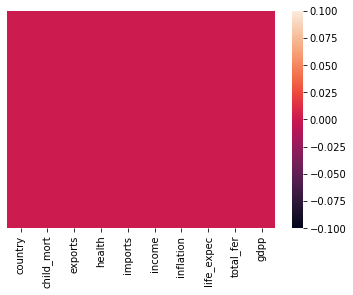

In [7]:
sns.heatmap(data.isnull(), yticklabels=False)

In [198]:
data.shape

(167, 10)

As the number of features and records aren't that much, using pairplot may give us some intuitions about data. 

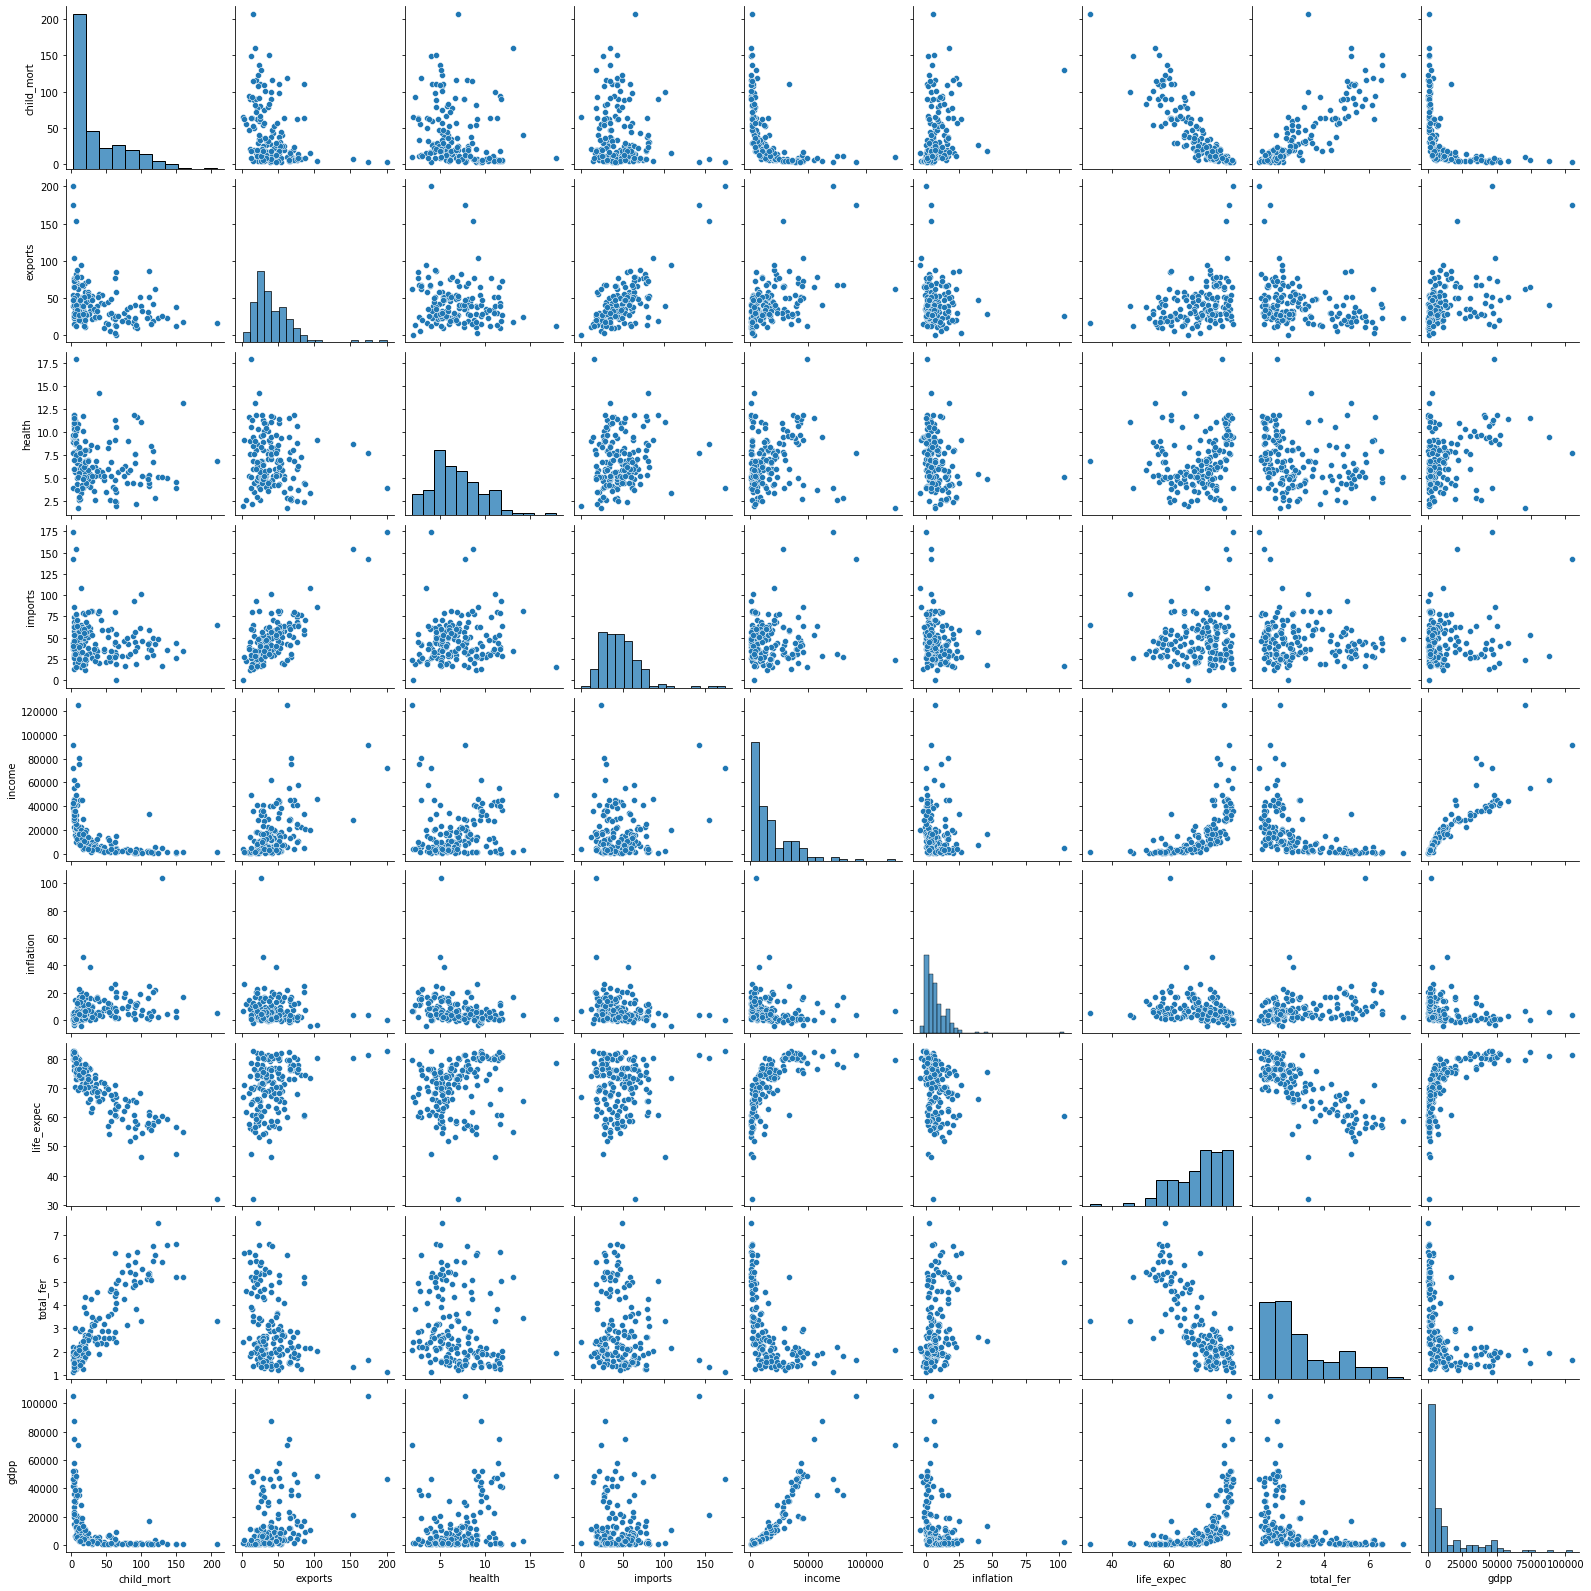

In [199]:
sns.pairplot(data)

# Child Mortality

In [8]:
#let's check the distribution of child mortality between countries
data['child_mort'].describe()

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

<AxesSubplot:xlabel='child_mort'>

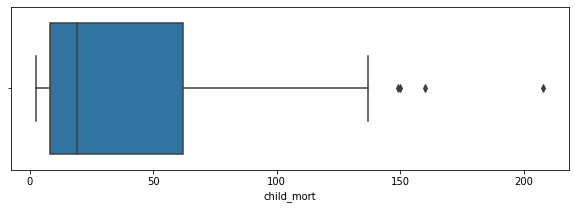

In [9]:
plt.figure(figsize=(10,3))
sns.boxplot(data['child_mort'])

In [10]:
#Top 10 countries with the highest child mortality
df = data[data['child_mort'] > 62]
df_sorted = df.sort_values(by='child_mort', ascending=False)
df_sorted[['country', 'child_mort']].head(10)

,country,child_mort
66,Haiti,208.0
132,Sierra Leone,160.0
32,Chad,150.0
31,Central African Republic,149.0
97,Mali,137.0
113,Nigeria,130.0
112,Niger,123.0
3,Angola,119.0
25,Burkina Faso,116.0
37,"Congo, Dem. Rep.",116.0


**Haiti** has the highest children mortality. However, we have some others moslty in Africa, as well as Asia.

**Here is the full list (sorted descending)**: 'Haiti',
 'Sierra Leone',
 'Chad',
 'Central African Republic',
 'Mali',
 'Nigeria',
 'Niger',
 'Angola',
 'Burkina Faso',
 'Congo, Dem. Rep.',
 'Guinea-Bissau',
 'Benin',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Guinea',
 'Cameroon',
 'Mozambique',
 'Lesotho',
 'Mauritania',
 'Burundi',
 'Pakistan',
 'Malawi',
 'Togo',
 'Afghanistan',
 'Liberia',
 'Comoros',
 'Zambia',
 'Uganda',
 'Gambia',
 'Lao',
 'Sudan',
 'Ghana',
 'Tanzania',
 'Senegal',
 'Myanmar',
 'Congo, Rep.',
 'Gabon',
 'Rwanda',
 'Kiribati',
 'Timor-Leste',
 'Madagascar',
 'Kenya'

Lets show these contries on the map.

In [203]:
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim()
#result of above code
country_name = list(df.sort_values(by='child_mort', ascending=False)['country'])
mortality_value = list(df.sort_values(by='child_mort', ascending=False)['child_mort'])
lat_lon = []
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return 'NA'
lat_lon.extend([geolocate(country) for country in country_name])

In [204]:
#let check if we miss any country lat/lan
for i, loc in enumerate(lat_lon):
  if loc == 'NA':
    print(i, country_name[i])

9 Congo, Dem. Rep.
35 Congo, Rep.


In [205]:
#fix the missings manually
lat_lon[9] = (-4.0335162, 21.7500603)
lat_lon[35] = (-4.267778, 15.291944)

In [207]:
import folium
from folium.plugins import MarkerCluster

In [208]:
#empty map
world_map= folium.Map(tiles="cartodbpositron",zoom_start = 10,height='40%', width='50%')
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of child mortality
for i, item in enumerate(lat_lon):
        lat, long = item
        radius=8
        iframe = folium.IFrame('Country: ' + country_name[i] + '<br>' + 'Mortality: ' + str(mortality_value[i]))
        popup = folium.Popup(iframe, min_width=150, max_width=250)
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup, fill =True).add_to(marker_cluster)
#show the map
world_map

# Exports

In [210]:
data['exports'].describe()

count    167.000000
mean      41.108976
std       27.412010
min        0.109000
25%       23.800000
50%       35.000000
75%       51.350000
max      200.000000
Name: exports, dtype: float64

<AxesSubplot:xlabel='exports'>

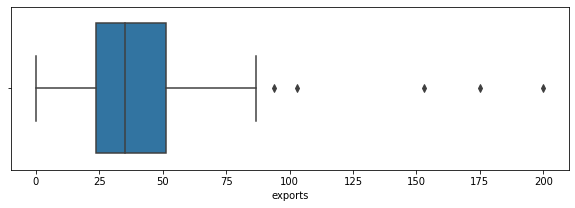

In [211]:
plt.figure(figsize=(10,3))
sns.boxplot(data['exports'])

In [241]:
#top 10 countries with the lowest exports
df = data[data['exports'] < 23]
df_sorted = df.sort_values(by='exports')
df_sorted[['country', 'exports']].head(10)

,country,exports
107,Myanmar,0.109
149,Timor-Leste,2.200
50,Eritrea,4.790
26,Burundi,8.920
109,Nepal,9.580
0,Afghanistan,10.000
22,Brazil,10.700
31,Central African Republic,11.800
126,Rwanda,12.000
151,Tonga,12.400


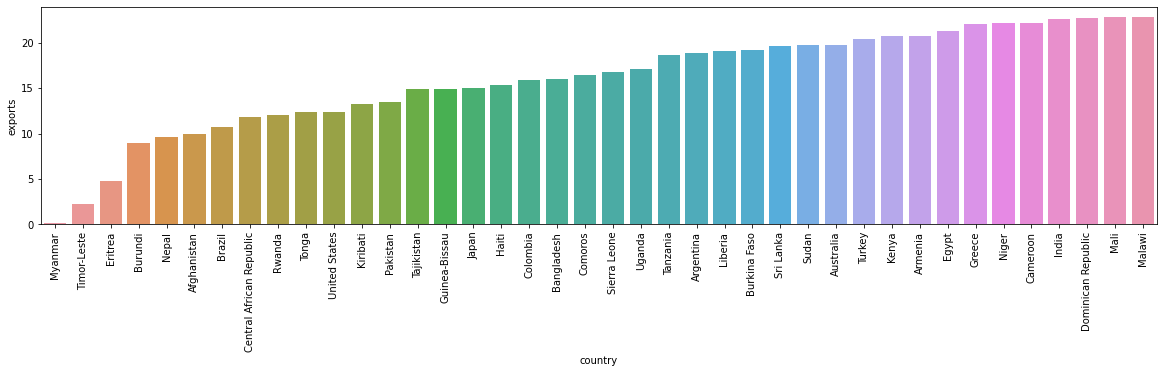

In [236]:
plt.figure(figsize=(20,4))
sns.barplot(data=df_sorted, x='country', y = 'exports')
plt.xticks(rotation=90)
plt.show()

# Health

In [237]:
data['health'].describe()

count    167.000000
mean       6.815689
std        2.746837
min        1.810000
25%        4.920000
50%        6.320000
75%        8.600000
max       17.900000
Name: health, dtype: float64

<AxesSubplot:xlabel='health'>

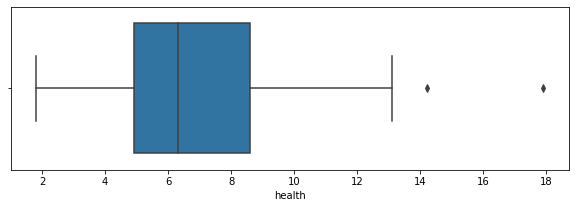

In [238]:
plt.figure(figsize=(10,3))
sns.boxplot(data['health'])

Total **Health** spending per capita shows kind of normal distribution. let's check top lowest countries in this category.

In [240]:
#top five countries with the lowest health
df = data[data['health'] < 4]
df_sorted = df.sort_values(by='health')
df_sorted[['country', 'health']].head(10)

,country,health
123,Qatar,1.81
107,Myanmar,1.97
116,Pakistan,2.20
38,"Congo, Rep.",2.46
154,Turkmenistan,2.50
70,Indonesia,2.61
82,Kuwait,2.63
50,Eritrea,2.66
115,Oman,2.77
23,Brunei,2.84


The same analysis can be done for other features as well.

# Feature Engineering

<AxesSubplot:>

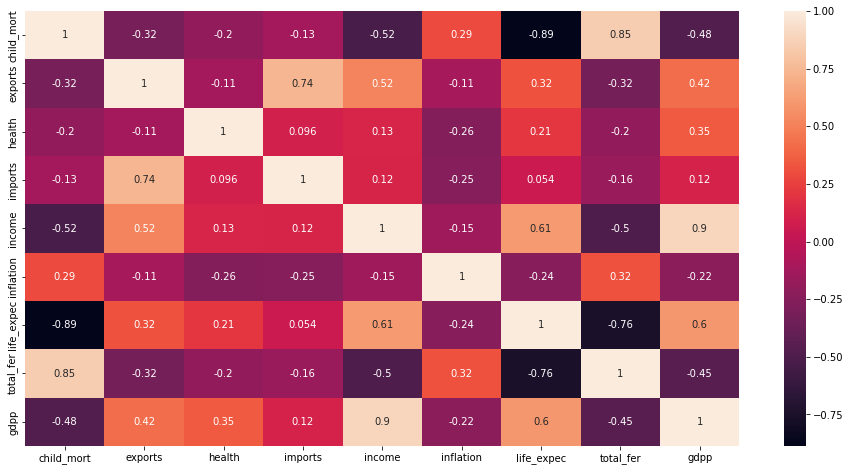

In [246]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True)

- **child_mort** has negative correlation with **income**, **gdpp** & **exports**. 
- Rise in **inflation** leads to high **child_mort**.
- **exports** has positive correlation with **gdpp**, **income** & **imports**.
- health shows normal distribution and has a small effect on **life_expec** and **child_mort**.
- **income** & **gdpp** shows a very high 0.9 correlation. 
- From the health perspective, high income has lead to higher life_expec but decreases the total_fer by some significant margin.
- Higher **life_expec** shows a low **total_fer**. 
- Higher **gdpp** results in more spending on **health**.

In [27]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaled_data = mms.fit_transform(data.drop('country',axis=1))

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_data)

In [29]:
x_pca.shape

(167, 3)

The heatmap and the color bar represent the correlation between the various feature and the principal component itself.

# Clustering

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_pca)

KMeans(n_clusters=3)

In [42]:
cluster = kmeans.cluster_centers_
labels = kmeans.labels_

In [23]:
from mpl_toolkits.mplot3d import Axes3D

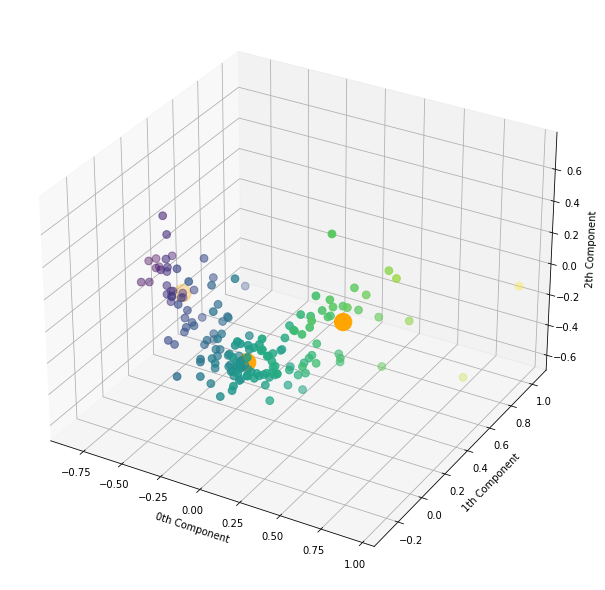

In [63]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
x = x_pca[:,0]
y = x_pca[:,1]
z = x_pca[:,2]
ax.scatter(cluster[:,0],cluster[:,1],cluster[:,2], s=[300,300,300], color = 'orange') #clusters' center
ax.scatter(x,y,z, c=[x], s=60)
ax.set_xlabel('0th Component')
ax.set_ylabel('1th Component')
ax.set_zlabel('2th Component')
plt.show();

<AxesSubplot:>

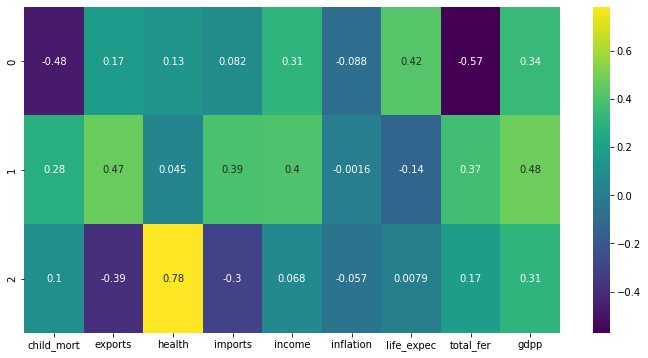

In [65]:
df_comp = pd.DataFrame(pca.components_,columns=data.columns[1:])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='viridis',annot=True)

The heatmap and the color bar represent the correlation between the various feature and the principal component itself.

**0th Component**: child_mort, total_fer, inflation, life_expec, total_fer <br>
**1th Component**: exports, imports, income, gdpp<br>
**2th Component**: health<br>